# 로지스틱 회귀 (LogisticRegression)
- 선형회귀 알고리즘을 이용한 이진 분류 모델
- Sample이 특정 클래스에 속할 확률을 추정한다.    
    
## 확률 추정
- 선형회귀 처럼 입력 특성(Feature)에 가중치 합을 계산한 값을 로지스틱 함수를 적용해 확률을 계산한다.

$$
\hat{p} = \sigma \left( \mathbf{W}^{T} \cdot \mathbf{x} + b\right)\\
\sigma():\:logistic\,함수,\quad \mathbf{W}:\:가중치,\quad \mathbf{x}:\:입력 특성
$$

- ### 로지스틱 함수
    - 0과 1사이의 실수를 반환한다.
    - S 자 형태의 결과를 내는 **시그모이드 함수(sigmoid function)** 이다.

$$
\sigma(x) = \frac{1}{1 + \mathbf{e}^{-x}}
$$

- 샘플 **x**가 양성에 속할 확률

$$
\hat{y} = \begin{cases} 0\quad\hat{p}<0.5\\1\quad\hat{p}\geqq0.5 \end{cases}
$$

(100,) (100,)


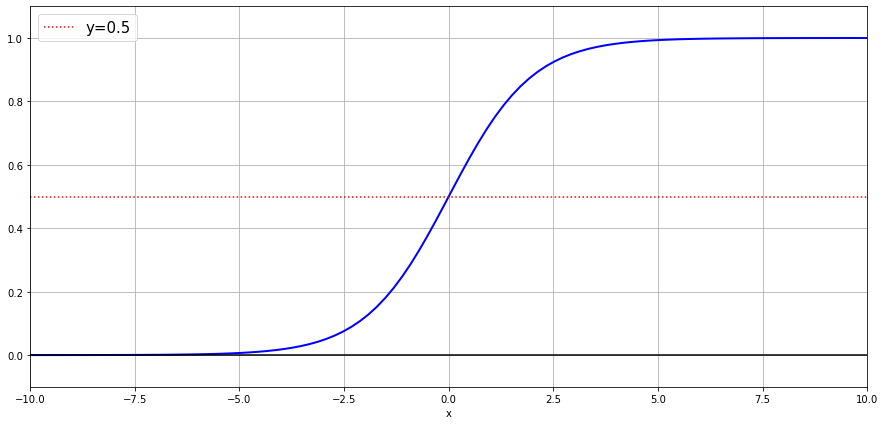

In [6]:
import matplotlib.pyplot as plt
import numpy as np

xx = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-xx))
print(xx.shape, sig.shape)
plt.figure(figsize=(15, 7))

plt.plot(xx, sig, color='b', linewidth=2)

plt.plot([-10, 10], [0, 0], color='k', linestyle='-')
plt.plot([-10, 10], [0.5, 0.5], color='r', linestyle=':', label='y=0.5')

plt.xlabel("x")
plt.legend(fontsize=15)
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.show()

## 손실 함수(Loss Function)
- LogisticRegression의 전체 데이터 셋에 대한 손실함수는 아래공식과 같다.
- **로그 손실(log loss)**, **Binary Cross Entropy** 라고 한다.
$$
L(\mathbf{W}) = - \frac{1}{m} \sum_{i=1}^{m}{\left[ y_{i} \log{\left( \hat{p}_i \right)} + \left( 1 - y_i \right) \log{\left( 1 - \hat{p}_i \right)} \right]}\\
y:\:실제값,\quad\hat{p}:\:예측확률
$$

- y(실제값) 이 1인 경우 $y_{i}\log{\left(\hat{p}_i\right)}$ 이 손실을 계산
- y가 0인 경우 $\left( 1 - y_i \right) \log{\left( 1 - \hat{p}_i \right)}$이 손실을 계산
- $\hat{p}$(예측확률)이 클수록 반환값은 작아지고 작을 수록 값이 커진다. 

## 최적화 
- 위 손실을 가장 적게하는 W(가중치)를 찾는다. 
- 로그 손실함수는 최소값을 찾는 정규방적식이 없기 때문에 **LogisticRegression은 경사하강법을 이용해 최적화를 진행한다.**
- 로그 손실을 $\mathbf{W}$로 미분하면 다음과 같다.
    - 아래 도함수로 기울기를 구해 기울기가 0이 될 때 까지 W(가중치)들을 update한다.
$$
\frac{\partial}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m}{\left( \sigma \left( \mathbf{W}^{T} \cdot \mathbf{x}_i \right) - \mathbf{y}_i \right)} x_{ij}
$$


In [18]:
-np.log(1), -np.log(0.99), -np.log(0.7), -np.log(0.51), -np.log(0.5)

(-0.0,
 0.01005033585350145,
 0.35667494393873245,
 0.6733445532637656,
 0.6931471805599453)

In [17]:
-np.log(0.4), -np.log(0.2), -np.log(0.0000001)

(0.916290731874155, 1.6094379124341003, 16.11809565095832)

In [11]:
import numpy as np
# 0 ~ 1
np.log(1), np.log(0.7), np.log(0.5), np.log(0.1), np.log(0.0000000001)

(0.0,
 -0.35667494393873245,
 -0.6931471805599453,
 -2.3025850929940455,
 -23.025850929940457)

## LogisticRegression 주요 하이퍼파라미터
- penalty: 과적합을 줄이기 위한 규제방식
    - 'l1', 'l2'(기본값), 'elasticnet', 'none' 
- C: 규제강도(기본값 1) - 작을 수록 규제가 강하다.
- max_iter(기본값 100) : 경사하강법 반복횟수

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [3]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# 모델 생성 + 학습
lr = LogisticRegression(random_state=0)
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [5]:
# 평가
pred_train = lr.predict(X_train_scaled)
pred_test = lr.predict(X_test_scaled)

accuracy_score(y_train, pred_train),  accuracy_score(y_test, pred_test)

(0.9906103286384976, 0.958041958041958)

In [10]:
# GridSearchCV 파라미터 - penalty, C 
param = {
    'penalty':['l1', 'l2'], 
    'C':[0.001, 0.01, 0.1, 1, 10]
}
gs = GridSearchCV(LogisticRegression(random_state=0), 
                  param,
                  cv=5, 
                  scoring='accuracy', 
                  n_jobs=-1)

In [11]:
gs.fit(X_train_scaled, y_train)

C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.87805746        nan 0.94845417        nan 0.97660739
        nan 0.97422709        nan 0.95781122]
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [13]:
import pandas as pd
result = pd.DataFrame(gs.cv_results_)
result.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.012368,0.003373,0.000797,0.000398,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.941860,0.988235,0.976471,0.988235,0.988235,0.976607,0.017961,1
7,0.015361,0.002242,0.000596,0.000486,1,l2,"{'C': 1, 'penalty': 'l2'}",0.953488,0.976471,0.964706,0.976471,1.000000,0.974227,0.015460,2
9,0.024535,0.002157,0.000000,0.000000,10,l2,"{'C': 10, 'penalty': 'l2'}",0.930233,0.952941,0.952941,0.952941,1.000000,0.957811,0.022854,3
3,0.020938,0.011683,0.001399,0.001853,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.906977,0.976471,0.929412,0.952941,0.976471,0.948454,0.027103,4
1,0.016953,0.007701,0.000807,0.000404,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.825581,0.894118,0.847059,0.917647,0.905882,0.878057,0.035536,5


In [14]:
gs.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [15]:
best_model = gs.best_estimator_
pred_test = best_model.predict(X_test_scaled)
accuracy_score(y_test, pred_test)

0.958041958041958